# Figures and Tables for Welfare Analysis

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from importlib import reload
import pandas as pd
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import bisect
from functools import partial
from itertools import product

In [2]:
from tools import micro
from tools import macro
from tools import params
from tools import distributions as dist
reload(micro)
reload(macro)
reload(params)
reload(dist)

<module 'tools.distributions' from '/Users/flangot/Dropbox/agghealth/notebooks/tools/distributions.py'>

## Model Parameters

In [3]:
pars = pd.read_pickle('../output_JPE/pars.pkl')
pars

,de,dk,fr,it,nl,se,sp,us
beta,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000
psi,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578
sigma,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317
phi,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405
d1,-1.282523,-1.602088,-1.099845,-0.831846,-1.390736,-1.394792,0.002353,-0.988958
d2,4.029535,4.273080,3.786290,3.917407,3.992196,4.310991,3.434494,3.511651
p,0.836301,0.888409,0.604059,0.695076,0.657280,0.891689,0.642584,1.000000
tfp,1.011023,1.260592,0.922111,0.613212,0.989482,0.795415,0.795095,1.000000


## Simulation Results

In [4]:
# With nk=30 for value functions and nk=100 for the distribution <=> Estimation
aggs = pd.read_pickle('../output_JPE/welfare_aggregates.pkl')
scenarios = aggs.columns
aggs

,pus_ge,peu_ge,peu_pe,aeu_ge,aeu_pe
m,0.605911,0.64289,0.632483,0.586666,0.589402
y,4.323834,4.340011,4.340011,3.740529,4.340011
c,2.332042,2.461629,2.340356,1.994271,2.051131
k,28.485264,28.76385,27.990661,24.793561,26.002832
n,1.336970,1.33697,1.336970,1.33697,1.336970
s,0.140133,0.110366,0.109721,0.116855,0.115274
csy,0.679479,0.67756,0.654639,0.689993,0.653699
ksy,6.587964,6.627598,6.449444,6.628357,5.991420
h,0.896541,0.925552,0.922401,0.887038,0.890392
g2,1.135880,1.113289,1.111570,1.144128,1.139965


In [5]:
# With nk=100 for value functions and nk=100 for the distribution 
aggs = pd.read_pickle('../output_JPE/welfare_aggregates2.pkl')
scenarios = aggs.columns
aggs

,pus_ge,peu_ge,peu_pe,aeu_ge,aeu_pe
m,0.578836,0.622638,0.608644,0.553722,0.555123
y,4.293955,4.311544,4.311544,3.713878,4.311544
c,2.324516,2.459771,2.332787,2.000077,2.024630
k,27.975086,28.274721,27.512682,24.335801,24.987651
n,1.336970,1.33697,1.336970,1.33697,1.336970
s,0.134803,0.107595,0.106285,0.111085,0.110242
csy,0.676149,0.678103,0.653043,0.687637,0.649893
ksy,6.514993,6.557911,6.381167,6.552666,5.795523
h,0.913211,0.932086,0.930483,0.893681,0.895197
g2,1.150778,1.118364,1.121940,1.179176,1.167581


In [6]:
# With nk=100 for value functions and nk=500 for the distribution <=> Estimation
aggs = pd.read_pickle('../output_JPE/welfare_aggregates3.pkl')
scenarios = aggs.columns
aggs

,pus_ge,peu_ge,peu_pe,aeu_ge,aeu_pe
m,0.585611,0.638473,0.619166,0.560748,0.562261
y,4.280491,4.311712,4.311712,3.685417,4.311712
c,2.310971,2.450037,2.327442,1.95743,1.988582
k,27.747057,28.2776,27.589971,23.852752,24.000303
n,1.336970,1.33697,1.336970,1.33697,1.336970
s,0.136809,0.110327,0.108006,0.113363,0.113400
csy,0.676694,0.678555,0.652925,0.683282,0.651706
ksy,6.482214,6.558323,6.398844,6.472198,5.566305
h,0.908333,0.925911,0.923838,0.883893,0.888327
g2,1.148491,1.12008,1.124344,1.17685,1.172020


In [7]:
eqs_temp = []
opt_temp = []

In [8]:
scenarios = ['pus_ge','peu_ge','peu_pe','aeu_ge','aeu_pe']

for scn in scenarios:
    file = open('../output_JPE/eq_'+scn+'3.pkl','rb')
    eq = pickle.load(file)
    file.close()
    eqs_temp.append(eq)
    opt = pd.read_pickle('../output_JPE/opt_'+scn+'3.pkl')
    opt_temp.append(opt)

In [9]:
eqs  = dict(zip(scenarios,eqs_temp))
opts = dict(zip(scenarios,opt_temp))

## Computing WTP

In [10]:
gridk = eqs['pus_ge'].stats.gridk
ne, nk, nh = eqs['pus_ge'].stats.ne, eqs['pus_ge'].stats.nk, eqs['pus_ge'].stats.nh

In [11]:
def dif(k,fb,fj):
    return fj(k) - fb

In [12]:
for scn in scenarios[1:]:
    opts[scn]['wtp'] = 0.0

In [13]:
for e in range(ne):
    for h in range(nh):
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        vb = opts['pus_ge'].loc[cond,'v'] #peu_ge
        fb = interp1d(gridk,vb,kind='cubic')
        for scn in scenarios[1:]:
            vj = opts[scn].loc[cond,'v'] #pus_ge
            fj = interp1d(gridk,vj,kind='cubic')
            for i,k in enumerate(gridk):
                if scn=='aeu_ge' or scn=='aeu_pe':
                    lim = [k,gridk[-1]]
                else :
                    lim = [0,k]
                d = partial(dif,fb=fb(k),fj=fj)
                try:
                    kp = bisect(d,lim[0],lim[1],disp=False)
                except (RuntimeError, TypeError, NameError,ValueError):
                    kp = np.nan
                    pass
                wtp = k - kp # kp - k
                opts[scn].loc[cond & (opts[scn].k == i),'wtp'] = wtp

In [14]:
for scn in scenarios[1:]:
    opts[scn]['wtpfl'] = 0.0

In [15]:
# The fixed value is the one of US with peu price <=> the higher utility
# With the higher as the benchmark, we can alway defined the wtp
# => how much I must give to the losers (those in the benchmark) to compensate their lower utility 
# Here the losers are in the benchmark

for e in range(ne):
    for h in range(nh):
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        vb = opts['peu_ge'].loc[cond,'v'] #peu_ge
        fb = interp1d(gridk,vb,kind='cubic')
        vj = opts['pus_ge'].loc[cond,'v'] #pus_ge
        fj = interp1d(gridk,vj,kind='cubic')
        for i,k in enumerate(gridk):
            lim = [k,gridk[-1]]
            d = partial(dif,fb=fb(k),fj=fj)
            try:
                kp = bisect(d,lim[0],lim[1],disp=False)
            except (RuntimeError, TypeError, NameError,ValueError):
                kp = np.nan
                pass
            wtpfl = kp - k 
            opts['peu_ge'].loc[cond & (opts['peu_ge'].k == i),'wtpfl'] = wtpfl

In [16]:
# The fixed value is the one of US with peu price <=> the higher utility
# With the higher as the benchmark, we can alway defined the wtp
# => how much I must give to the losers (those in the benchmark) to compensate their lower utility 
# Here the losers are in the benchmark

for e in range(ne):
    for h in range(nh):
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        vb = opts['peu_pe'].loc[cond,'v'] #peu_ge
        fb = interp1d(gridk,vb,kind='cubic')
        vj = opts['pus_ge'].loc[cond,'v'] #pus_ge
        fj = interp1d(gridk,vj,kind='cubic')
        for i,k in enumerate(gridk):
            lim = [k,gridk[-1]]
            d = partial(dif,fb=fb(k),fj=fj)
            try:
                kp = bisect(d,lim[0],lim[1],disp=False)
            except (RuntimeError, TypeError, NameError,ValueError):
                kp = np.nan
                pass
            wtpfl = kp - k 
            opts['peu_pe'].loc[cond & (opts['peu_pe'].k == i),'wtpfl'] = wtpfl

In [17]:
# The fixed value is the one of US with aus TFP <=> the higher utility 
# With the higher as the benchmark, we can alway defined the wtp
# => how much I must take to the winners to overcompensate their higher utility 
# Here the winners are in the benchmark

for e in range(ne):
    for h in range(nh):
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        vb = opts['pus_ge'].loc[cond,'v'] #peu_ge
        fb = interp1d(gridk,vb,kind='cubic')
        vj = opts['aeu_ge'].loc[cond,'v'] #pus_ge
        fj = interp1d(gridk,vj,kind='cubic')
        for i,k in enumerate(gridk):
            lim = [k,gridk[-1]]#lim = [0,k]
            d = partial(dif,fb=fb(k),fj=fj)
            try:
                kp = bisect(d,lim[0],lim[1],disp=False)
            except (RuntimeError, TypeError, NameError,ValueError):
                kp = np.nan
                pass
            wtpfl = k - kp 
            opts['aeu_ge'].loc[cond & (opts['aeu_ge'].k == i),'wtpfl'] = wtpfl

In [18]:
# The fixed value is the one of US with aus TFP <=> the higher utility 
# With the higher as the benchmark, we can alway defined the wtp
# => how much I must take to the winners to overcompensate their higher utility 
# Here the winners are in the benchmark

for e in range(ne):
    for h in range(nh):
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        vb = opts['pus_ge'].loc[cond,'v'] #peu_ge
        fb = interp1d(gridk,vb,kind='cubic')
        vj = opts['aeu_pe'].loc[cond,'v'] #pus_ge
        fj = interp1d(gridk,vj,kind='cubic')
        for i,k in enumerate(gridk):
            lim = [k,gridk[-1]]#lim = [0,k]
            d = partial(dif,fb=fb(k),fj=fj)
            try:
                kp = bisect(d,lim[0],lim[1],disp=False)
            except (RuntimeError, TypeError, NameError,ValueError):
                kp = np.nan
                pass
            wtpfl = k - kp 
            opts['aeu_pe'].loc[cond & (opts['aeu_pe'].k == i),'wtpfl'] = wtpfl

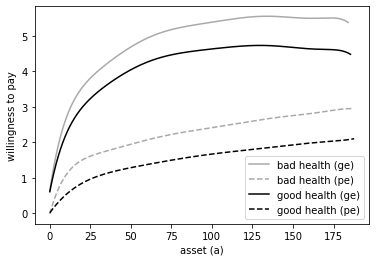

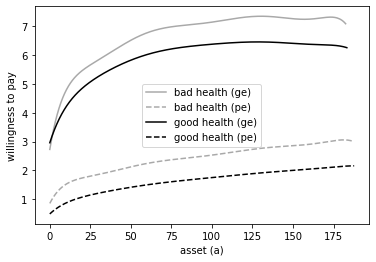

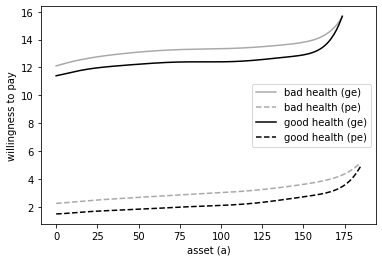

In [19]:
degpol = 8
hs = [0,1]
es = [0,4,9]
elabels = ['low','middle','high']
hlabels = ['bad health','good health']
hcolors = ['darkgray','black']
for i,e in enumerate(es):
    plt.figure()
    for h in hs:
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        wtps = opts['peu_ge'].loc[cond,'wtpfl']
        wtps.index = np.arange(len(wtps))
        ws = wtps.loc[wtps.isna()==False]

        ks = gridk[ws.index.values]
        p = np.polyfit(ks, ws, deg=degpol)#4)
        w = np.poly1d(p)
        plt.plot(ks,[w(k) for k in ks],color=hcolors[h],label=hlabels[h]+' (ge)')
        
        wtps = opts['peu_pe'].loc[cond,'wtpfl']
        wtps.index = np.arange(len(wtps))
        ws = wtps.loc[wtps.isna()==False]
        ks = gridk[ws.index.values]
        p = np.polyfit(ks, ws, deg=degpol)#4)
        w = np.poly1d(p)
        plt.plot(ks,[w(k) for k in ks],'--',color=hcolors[h],label=hlabels[h]+' (pe)')
    plt.xlabel('asset (a)')
    plt.ylabel('willingness to pay')
    plt.legend() 
    #plt.savefig('../figures_JPE/wtp_price_'+elabels[i]+'.eps')
    plt.show()

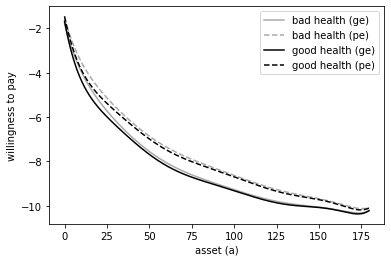

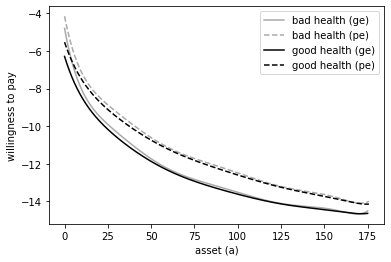

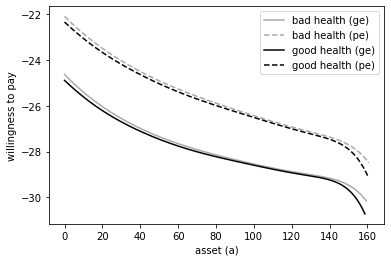

In [20]:
hs = [0,1]
es = [0,4,9]
elabels = ['low','middle','high']
hlabels = ['bad health','good health']
for i,e in enumerate(es):
    plt.figure()
    for h in hs:
        cond = (opts['pus_ge'].e == e) & (opts['pus_ge'].h == h)
        wtps = opts['aeu_ge'].loc[cond,'wtpfl']
        wtps.index = np.arange(len(wtps))
        ws = wtps.loc[wtps.isna()==False]
        ks = gridk[ws.index.values]
        p = np.polyfit(ks, ws, deg=degpol)
        w = np.poly1d(p)
        plt.plot(ks,[w(k) for k in ks],color=hcolors[h],label=hlabels[h]+' (ge)')
        
        wtps = opts['aeu_pe'].loc[cond,'wtpfl']
        wtps.index = np.arange(len(wtps))
        ws = wtps.loc[wtps.isna()==False]
        ks = gridk[ws.index.values]
        p = np.polyfit(ks, ws, deg=degpol)
        w = np.poly1d(p)
        plt.plot(ks,[w(k) for k in ks],'--',color=hcolors[h],label=hlabels[h]+' (pe)')
    plt.xlabel('asset (a)')
    plt.ylabel('willingness to pay')
    plt.legend()
    #plt.savefig('../figures_JPE/wtp_tfp_'+elabels[i]+'.eps')
    plt.show()

## Cost-of-Living Index

The price index is based on the follownig formula
$$
I_{LC}(a,h,e) = \frac{{\cal \hat{E}}_{US}}{{\cal E}_{EU}} = \frac{a + {\cal P} + G_{p=p_{EU}}}{a + G_{p=p_{EU}}} 
~~\Rightarrow~~ 
I_{LC}(h,e) = \sum_a \frac{a + {\cal P} + G_{p=p_{EU}}}{a + G_{p=p_{EU}}} \lambda(a)
$$
because the costs of living are 
$$
{\cal E}_{EU} = a + G_{p=p_{EU}}
$$
for an individual living in a economy where $p=p_{EU}$ and with the endovment $a + G_{p=p_{EU}}$ and 
$$
{\cal \hat{E}}_{US} = a + {\cal P} + G_{p=p_{EU}}
$$
for an individual living in a economy where $p=p_{US}$ and with the same endovment $a + G_{p=p_{EU}}$

Remark: it is necessary to control for the changes in $G$ in order to have two individuals with the same endovments. This leads to define ${\cal \hat{E}}_{US}$ which is different from the standard expenditure function
$$
{\cal \hat{E}}_{US} \neq {\cal E}_{US} = a + {\cal P} + G_{p=p_{US}}
$$


### Human Wealth

In [21]:
ge = np.zeros((ne,len(scenarios)))
for i,scn in enumerate(scenarios):
    pi = eqs[scn].inc.tprob
    ri = 1/(1+aggs.loc['r',scn])
    res   = np.eye(ne) - ri*pi
    ires   = np.linalg.inv(res)
    ge[:,i] = (1-aggs.loc['tax',scn])*aggs.loc['w',scn]*(ires@np.exp(eqs[scn].inc.pte))

### Index

We raplace the NaN for the WTP by the min(WTP)

In [22]:
for scn in scenarios[1:]:
    opts[scn]['ilt'] = 0.0
    opts[scn]['ge']  = 0.0

for i in opts['pus_ge'].index:   
    for j,scn in enumerate(scenarios[1:]):
        col_ref = gridk[opts['pus_ge'].loc[i,'k']] + opts[scn].loc[i,'wtpfl'] + ge[opts[scn].loc[i,'e'],1+j]
        col     = gridk[opts[scn].loc[i,'k']] + ge[opts[scn].loc[i,'e'],1+j]
        cc_ref  = gridk[opts['pus_ge'].loc[i,'k']] + opts[scn].loc[i,'wtpfl']
        cc      = gridk[opts['pus_ge'].loc[i,'k']]
        opts[scn].loc[i,'ge']      = ge[opts['pus_ge'].loc[i,'e'],0]/ge[opts[scn].loc[i,'e'],1+j]
        opts[scn].loc[i,'col']     = col
        opts[scn].loc[i,'col_ref'] = col_ref        
        opts[scn].loc[i,'ilt']     = (col_ref/col)*100

### Table 7

In [23]:
es = [0,4,9]
columns = ['0','4','9','Total']
hs = [0,1]
equ = ['ge','pe']
ll = [equ,hs]
rows = list(product(*ll))
index = pd.MultiIndex.from_tuples(rows, names=['equilibrium','health'])
table_p = pd.DataFrame(index=index,columns=columns)
for q in equ:
    for j,e in enumerate(es):
        for h in hs:
            cond = (opts['peu_'+q].e == e) & (opts['peu_'+q].h == h)
            sel  = opts['peu_'+q].loc[cond,['ps','ilt']]
            sel  = sel.loc[sel['ilt'].isna()!=True,:]
            sel['ps'] = sel['ps']/sel['ps'].sum()
            sel['p']  = sel['ps']*sel['ilt']
            table_p.loc[(q,h),columns[j]] = sel['p'].sum()
    sel = opts['peu_'+q].loc[:,['ps','ilt']]
    sel = sel.loc[sel['ilt'].isna()!=True,:]
    sel['ps'] = sel['ps']/sel['ps'].sum()
    sel['p'] = sel['ps']*sel['ilt']
    table_p.loc[(q,0),columns[-1]] = sel['p'].sum()  

In [24]:
table_p

0           4           9       Total
equilibrium health                                                
ge          0       100.413283  101.784572  103.306946   102.01908
            1        100.87632  101.904973  103.071425         NaN
pe          0        100.07596  100.616671  100.775511  100.454443
            1       100.221479  100.451743  100.542149         NaN

# Ratios of WTP over Consumption

## WTP(exp=i)/C(exp=bench)   $\Delta p$

In [25]:
es = [0,4,9]
columns = ['0','4','9','Total']
hs = [0,1]
equ = ['ge','pe']
ll = [equ,hs]
rows = list(product(*ll))
index = pd.MultiIndex.from_tuples(rows, names=['equilibrium','health'])
table_w = pd.DataFrame(index=index,columns=columns)
for q in equ:
    for j,e in enumerate(es):
        for h in hs:
            cond = (opts['peu_'+q].e == e) & (opts['peu_'+q].h == h)
            sel  = opts['peu_'+q].loc[cond,['ps','wtpfl','c']]
            sel  = sel.loc[sel['wtpfl'].isna()!=True,:]
            sel['ps'] = sel['ps']/sel['ps'].sum()
            sel['Awtpfl']  = (sel['ps']*sel['wtpfl']).sum()
            sel['wtpc']    = ((sel['ps']*sel['wtpfl']).sum())/((sel['ps']*opts['pus_ge'].loc[cond,'c']).sum())
            table_w.loc[(q,h),columns[j]] = sel['wtpc'].loc[sel['wtpc'].index[0]]
    sel = opts['peu_'+q].loc[:,['ps','wtpfl','c']]
    sel = sel.loc[sel['wtpfl'].isna()!=True,:]
    sel['ps'] = sel['ps']/sel['ps'].sum()
    sel['Awtpfl']  = (sel['ps']*sel['wtpfl']).sum()
    sel['wtpc']    = ((sel['ps']*sel['wtpfl']).sum())/((sel['ps']*opts['pus_ge'].loc[:,'c']).sum())
    table_w.loc[(q,0),columns[-1]] = sel['wtpc'].loc[sel['wtpc'].index[0]]  

In [26]:
table_w

0         4         9     Total
equilibrium health                                        
ge          0       2.028637  2.956606  2.407544  2.343237
            1       2.009683     2.401  2.189884       NaN
pe          0       0.341216  0.932895  0.526583  0.478006
            1       0.460012  0.521958  0.362335       NaN

## WTP(exp=i)/C(exp=bench)   $\Delta A$

In [27]:
es = [0,4,9]
columns = ['0','4','9','Total']
hs = [0,1]
equ = ['ge','pe']
ll = [equ,hs]
rows = list(product(*ll))
index = pd.MultiIndex.from_tuples(rows, names=['equilibrium','health'])
table_w = pd.DataFrame(index=index,columns=columns)
for q in equ:
    for j,e in enumerate(es):
        for h in hs:
            cond = (opts['aeu_'+q].e == e) & (opts['aeu_'+q].h == h)
            sel  = opts['aeu_'+q].loc[cond,['ps','wtpfl','c']]
            sel  = sel.loc[sel['wtpfl'].isna()!=True,:]
            sel['ps'] = sel['ps']/sel['ps'].sum()
            sel['Awtpfl']  = (sel['ps']*sel['wtpfl']).sum()
            sel['wtpc']    = ((sel['ps']*sel['wtpfl']).sum())/((sel['ps']*opts['pus_ge'].loc[cond,'c']).sum())
            table_w.loc[(q,h),columns[j]] = sel['wtpc'].loc[sel['wtpc'].index[0]]
    sel = opts['aeu_'+q].loc[:,['ps','wtpfl','c']]
    sel = sel.loc[sel['wtpfl'].isna()!=True,:]
    sel['ps'] = sel['ps']/sel['ps'].sum()
    sel['Awtpfl']  = (sel['ps']*sel['wtpfl']).sum()
    sel['wtpc']    = ((sel['ps']*sel['wtpfl']).sum())/((sel['ps']*opts['pus_ge'].loc[:,'c']).sum())
    table_w.loc[(q,0),columns[-1]] = sel['wtpc'].loc[sel['wtpc'].index[0]]  

In [28]:
table_w

0         4         9     Total
equilibrium health                                        
ge          0      -4.692648  -5.49394 -5.277249 -5.063757
            1      -4.170588 -4.975933 -5.201777       NaN
pe          0      -4.070384 -4.825258  -4.82171 -4.548884
            1      -3.711011  -4.44834 -4.759307       NaN